<a href="https://colab.research.google.com/github/Sauman9456/Circus-Social-/blob/main/Circus_Social.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1aVOEyU485gRc6_Wjx5j1neRYK1GQTmfx' -O Twitter.csv

--2021-07-31 05:37:21--  https://docs.google.com/uc?export=download&id=1aVOEyU485gRc6_Wjx5j1neRYK1GQTmfx
Resolving docs.google.com (docs.google.com)... 142.250.136.102, 142.250.136.100, 142.250.136.101, ...
Connecting to docs.google.com (docs.google.com)|142.250.136.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/611s925cihcdsj62rgv4pddiajadgv0l/1627709775000/01596757284656355981/*/1aVOEyU485gRc6_Wjx5j1neRYK1GQTmfx?e=download [following]
--2021-07-31 05:37:24--  https://doc-0g-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/611s925cihcdsj62rgv4pddiajadgv0l/1627709775000/01596757284656355981/*/1aVOEyU485gRc6_Wjx5j1neRYK1GQTmfx?e=download
Resolving doc-0g-b8-docs.googleusercontent.com (doc-0g-b8-docs.googleusercontent.com)... 74.125.129.132, 2607:f8b0:4001:c15::84
Connecting to doc-0g-b8-docs.googleusercontent.com (doc-0g-

In [ ]:
import pandas as pd
import numpy as np
import warnings
from time import time

#import phik
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.linear_model import LinearRegression,BayesianRidge,Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor

warnings.filterwarnings('ignore')

In [ ]:
df_twitter = pd.read_csv('Twitter.csv', index_col=0)
df_twitter

,Id,Post Contet,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
41370,6d967b125fcecba6357dbc43f8f380cf2d6d7a51,Sana all na lang.,0.00,17.0,0.0,0.0,1660.0,133.0,0,TEXT,2021-01-28 12:17:24+00:00,0.0,0.0,0.0,0.0,0.0,0.0
27955,22dc5f808a8589186767412f39e5c88ae9753d04,キスマイ玉森裕太「ボス恋」台本の裏話明かす\n\n@TBS_asachan @bosskoi...,19.30,84.0,0.0,1.0,318924.0,1428273.0,5454,TEXT,2021-02-24 06:51:02+00:00,0.0,1.0,10.0,1.0,0.0,110.0
38151,7f224e66ad757e3066d45947881bcaab91f8e57f,SuperM’s album isn’t even out yet and there’s ...,0.00,78.0,0.0,0.0,39976.0,1560.0,0,TEXT,2020-09-15 01:16:32+00:00,0.0,0.0,0.0,0.0,0.0,0.0
13558,5acc220e7a337efafc4c847b7f74680ca2515890,மத்திய அரசின் நலத்திட்டங்களை மக்களுக்கு சென்று...,0.00,284.0,2.0,0.0,8045.0,27191.0,26,TEXT,2021-02-14 03:53:53+00:00,0.0,1.0,460.0,219.0,4.0,6830.0
17071,863abf834897a06afdc459788b34abeae6298f3a,【熊本県人吉市】球磨川氾濫後のくま川鉄道の線路被害状況 hamusoku.com/archi...,-20.00,80.0,0.0,1.0,210996.0,2385.0,0,IMAGE,2020-07-04 13:06:16+00:00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,12abc0db859c471306b03dc5c707b175c2324395,オフィスをテレワーク対応に！ ― 「ビデオ会議の音がうるさい！」を解決する可動式集中ブース「...,0.00,107.0,0.0,1.0,58592.0,61369.0,0,TEXT,2020-08-18 07:30:03+00:00,0.0,0.0,0.0,0.0,0.0,0.0
13060,79977b2cca17e65bc00707e805eaf0e06bc15d1b,【 #瘟疫與中共】比利時王子染疫 母親曾率團訪華和 #王岐山 會面\n\n#比利時 王子約阿...,0.00,123.0,0.0,1.0,69967.0,37227.0,0,TEXT,2020-06-03 01:00:15+00:00,0.0,0.0,0.0,0.0,0.0,0.0
38818,b5c56e393cde233b9e53e214978240f3793a9f99,Auto news News In Hindi : 2020 Hyundai Creta I...,0.00,226.0,0.0,1.0,1587.0,40.0,0,TEXT,2020-06-20 17:33:43+00:00,0.0,0.0,0.0,0.0,0.0,0.0
4545,e429a1885a6dbcf6856a599bcb5e2a6e629d18af,"""America's share of global GDP has come down a...",-10.18,303.0,2.0,0.0,593326.0,450949.0,1406,IMAGE,2020-08-29 11:50:00+00:00,0.0,1.0,3.0,0.0,0.0,30.0


In [ ]:
df_twitter['Media Type'].value_counts()

TEXT     30176
IMAGE    17426
VIDEO     2398
Name: Media Type, dtype: int64

In [ ]:
df_twitter.columns

Index(['Id', 'Post Contet', 'Sentiment score', 'Post Length', 'Hashtag count',
       'Content URL count', 'Tweet count', 'Followers count', 'Listed Count',
       'Media Type', 'Published DateTime', 'Mentions Count',
       'Post author verified', 'Likes', 'Shares', 'Comments', 'Impact'],
      dtype='object')

In [ ]:
df_twitter_s = df_twitter[['Id', 'Sentiment score', 'Post Length', 'Hashtag count',
       'Content URL count', 'Tweet count', 'Followers count', 'Listed Count',
       'Media Type', 'Mentions Count',
       'Post author verified', 'Likes', 'Shares', 'Comments', 'Impact']]
df_twitter_s['Media Type'] = np.where((df_twitter_s['Media Type'] == 'TEXT'), 0, np.where((df_twitter_s['Media Type'] == 'IMAGE'), 1, 2))
df_twitter_s

,Id,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
41370,6d967b125fcecba6357dbc43f8f380cf2d6d7a51,0.00,17.0,0.0,0.0,1660.0,133.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
27955,22dc5f808a8589186767412f39e5c88ae9753d04,19.30,84.0,0.0,1.0,318924.0,1428273.0,5454,0,0.0,1.0,10.0,1.0,0.0,110.0
38151,7f224e66ad757e3066d45947881bcaab91f8e57f,0.00,78.0,0.0,0.0,39976.0,1560.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
13558,5acc220e7a337efafc4c847b7f74680ca2515890,0.00,284.0,2.0,0.0,8045.0,27191.0,26,0,0.0,1.0,460.0,219.0,4.0,6830.0
17071,863abf834897a06afdc459788b34abeae6298f3a,-20.00,80.0,0.0,1.0,210996.0,2385.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,12abc0db859c471306b03dc5c707b175c2324395,0.00,107.0,0.0,1.0,58592.0,61369.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
13060,79977b2cca17e65bc00707e805eaf0e06bc15d1b,0.00,123.0,0.0,1.0,69967.0,37227.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
38818,b5c56e393cde233b9e53e214978240f3793a9f99,0.00,226.0,0.0,1.0,1587.0,40.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4545,e429a1885a6dbcf6856a599bcb5e2a6e629d18af,-10.18,303.0,2.0,0.0,593326.0,450949.0,1406,1,0.0,1.0,3.0,0.0,0.0,30.0


In [ ]:
df_twitter_s.isnull().sum()

Id                      0
Sentiment score         0
Post Length             0
Hashtag count           0
Content URL count       0
Tweet count             0
Followers count         0
Listed Count            0
Media Type              0
Mentions Count          0
Post author verified    0
Likes                   0
Shares                  0
Comments                0
Impact                  0
dtype: int64

pearson


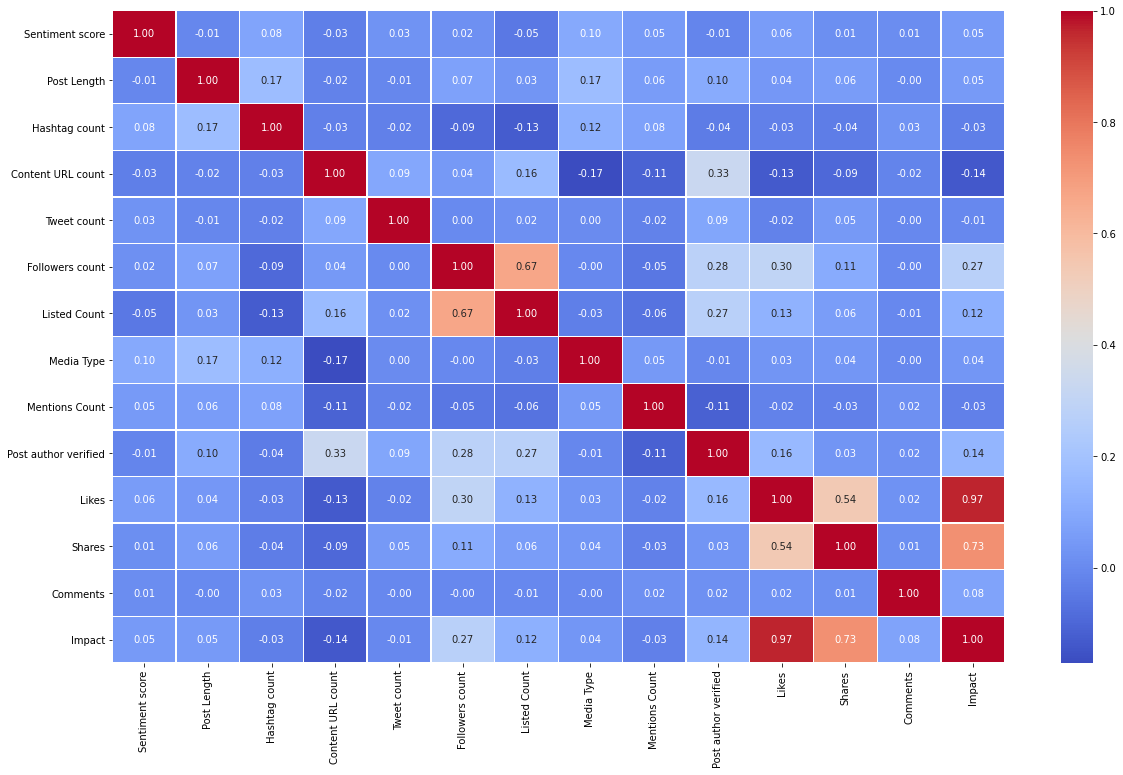



kendall


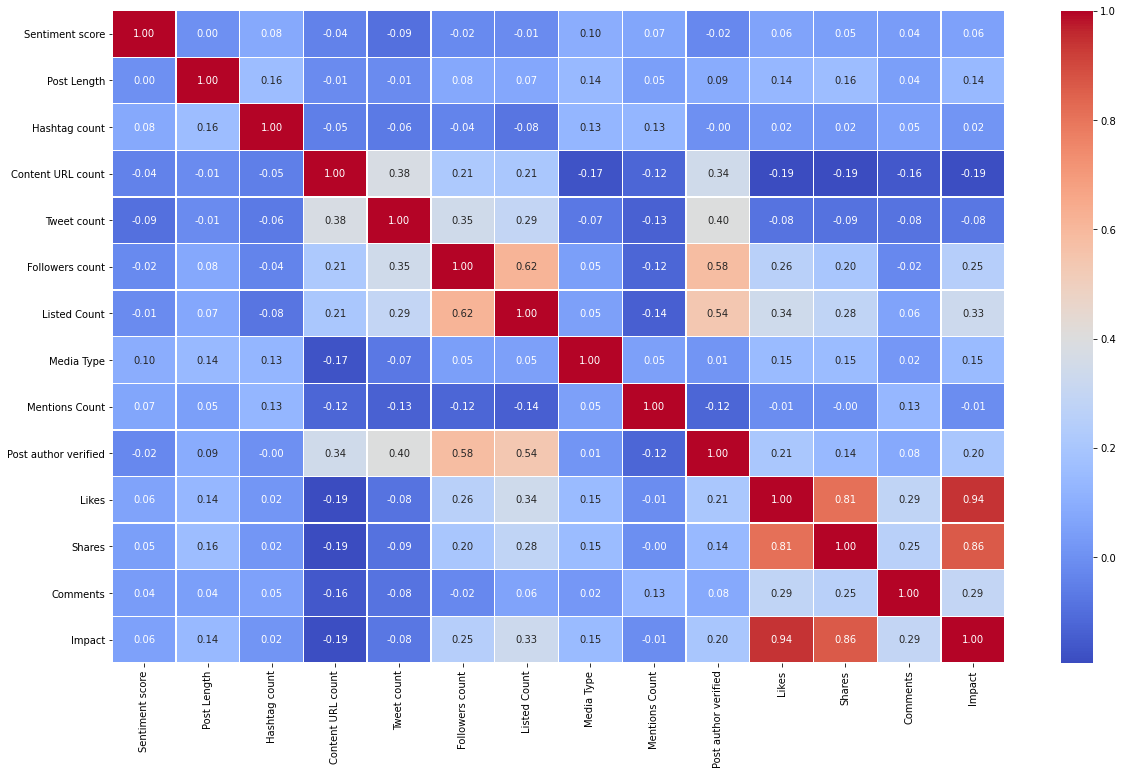



spearman


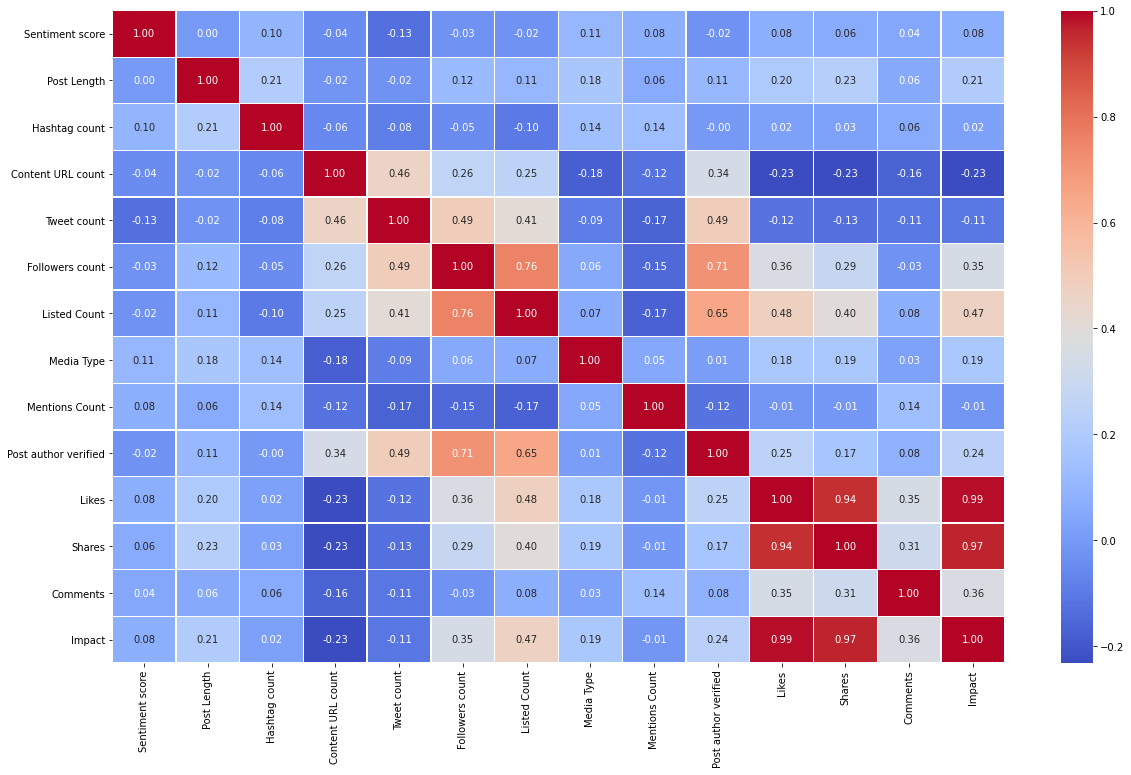

In [ ]:
#method{‘pearson’, ‘kendall’, ‘spearman’}
for i in ['pearson', 'kendall', 'spearman']:
  print(i)
  corr_matrix = df_twitter_s.corr(method= i)
  f, ax = plt.subplots(figsize=(20,12))
  sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
              annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.show()
  print()
  print()


**From the correlation analysis best performing features are:**

    1. Likes
    2. Shares

Lets find the relationship between features and Impact

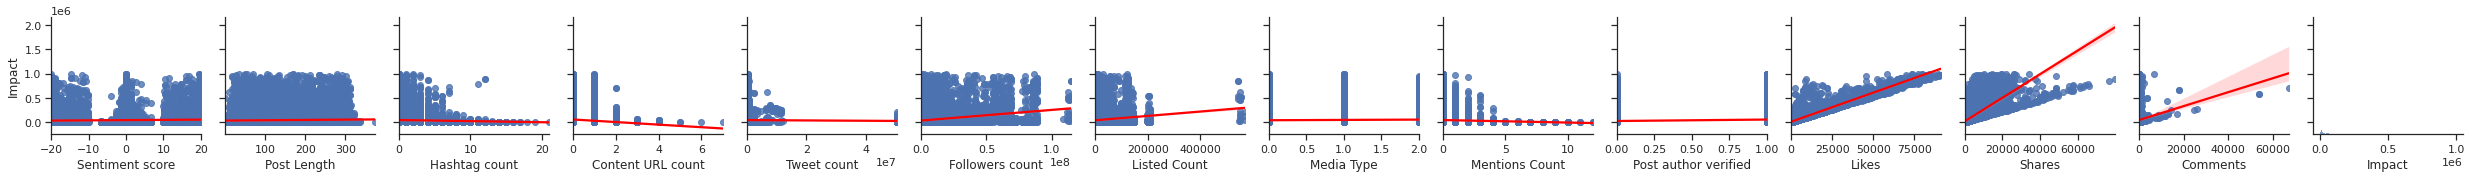

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_twitter_s, y_vars=['Impact'], kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

From the above graphs, we can see that Likes, Shares, and comments show a linear relationship with Impact. So if we train a model with these three features only, then linear regression will give the best result

Here for Feature importance we will be using adjusted R square and RMSE

Why adjusted R square?

*   The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors. ... The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance

In [ ]:
train_cols = ['Sentiment score', 'Post Length', 'Hashtag count',
       'Content URL count', 'Tweet count', 'Followers count', 'Listed Count',
       'Media Type', 'Mentions Count',
       'Post author verified', 'Likes', 'Shares', 'Comments']
X = df_twitter_s[train_cols]
y = df_twitter_s[['Impact']]

In [ ]:
def getAdjustedR2(r2, n , p):
    return 1 - (1 - r2)*(n-1)/(n-p-1)

def rmse(xx,yy):
  X_train,X_test,Y_train,Y_test=train_test_split(xx,yy, test_size=0.2, random_state=42)
  LR = LinearRegression() #15 #46
  LR.fit(X_train, Y_train)
  Y_pred = LR.predict(X_test)
  return np.sqrt(mean_squared_error(Y_test,Y_pred))



In [ ]:
feature_list = []
r2_change = []
r2_with_feature = []
r2_wo_feature = []
RMSE_with = []
RMSE_without = []
for col in X.columns:
    feature_list.append(col)
    x_without = X.drop([col], axis=1)
    model1 = LinearRegression().fit(x_without, y)
    model2 = LinearRegression().fit(X, y)
    r2_with_feature.append(model2.score(X,y))
    r2_wo_feature.append(model1.score(x_without,y))
    r2_change.append(getAdjustedR2(model2.score(X,y), X.size, len(X.columns)) - 
                     getAdjustedR2(model1.score(x_without, y), x_without.size, len(x_without.columns)))
    RMSE_with.append(rmse(X,y))
    RMSE_without.append(rmse(x_without,y))


r2_df = pd.DataFrame({'feature' : feature_list, 'adj_r2_diff' : r2_change, 
                      'r2_wo_feature':r2_wo_feature, 'r2_with_feature': r2_with_feature,
                      'RMSE_without': RMSE_without, 'RMSE_with':RMSE_with})

r2_df.sort_values(by=['adj_r2_diff'], ascending=False, ignore_index=True)

,feature,adj_r2_diff,r2_wo_feature,r2_with_feature,RMSE_without,RMSE_with
0,Likes,3.986389e-01,0.601369,1.0,64847.763639,3.467314
1,Shares,6.369230e-02,0.936309,1.0,26774.320567,3.467314
2,Comments,2.774390e-03,0.997226,1.0,2235.642262,3.467314
3,Listed Count,1.118994e-12,1.000000,1.0,3.467609,3.467314
4,Post author verified,7.106538e-13,1.000000,1.0,3.467255,3.467314
5,Followers count,4.762857e-13,1.000000,1.0,3.467576,3.467314
6,Content URL count,4.292122e-13,1.000000,1.0,3.467202,3.467314
7,Post Length,2.469136e-13,1.000000,1.0,3.467342,3.467314
8,Hashtag count,8.548717e-14,1.000000,1.0,3.467472,3.467314
9,Sentiment score,4.529710e-14,1.000000,1.0,3.467353,3.467314


**From the above table we can conclude that Likes, Shares and comments are the only feature that are enough to predict Impact.**

**Lets call this hypothesis is "hypo_1", we will work on this hypothesis later**

**Lets start the training on whole dataset**

In [ ]:
X = df_twitter_s[train_cols]
y = df_twitter_s[['Impact']]

pipelines = []
pipelines.append(('LR', Pipeline([('LR', LinearRegression())])))
pipelines.append(('KNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('DT', Pipeline([('DT', DecisionTreeRegressor())])))
pipelines.append(('RF', Pipeline([('RF', RandomForestRegressor())])))
pipelines.append(('EXT', Pipeline([('EXT', ExtraTreesRegressor())])))
pipelines.append(('GBM', Pipeline([('GBM', GradientBoostingRegressor())])))
pipelines.append(('XGB', Pipeline([('XGB', XGBRegressor(objective = "reg:squarederror"))])))
pipelines.append(('LGBM', Pipeline([('LGBM', LGBMRegressor())])))
pipelines.append(('NN', Pipeline([('NN', MLPRegressor())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean()*(-1))
    print(msg)
    print(cv_results * (-1))
    print("")

LR: 49.143982
[ 16.26262579   1.1615615   59.70163315  11.97927712  24.27902409
 241.06161521  15.52334796   4.01764657   2.94988319 114.5032054 ]

KNN: 3621917649.376480
[3.64535704e+09 3.31007648e+09 3.78381013e+09 3.18220667e+09
 4.08860163e+09 3.53730001e+09 4.11545280e+09 3.49580843e+09
 3.83307932e+09 3.22748399e+09]

DT: 13797520.060000
[11981060.52 20162075.22 13300795.06 18566567.48 13109758.22 10925257.98
 12789399.46 10135396.5  13536103.58 13468786.58]

RF: 8164572.221322
[ 4181991.028922    9398402.63689401 11678078.873292   16303824.05304799
 11847062.131078    4631727.214978    4156810.930904    4552291.799964
  8629827.24898599  6265706.295158  ]

EXT: 4650993.749493
[  561197.139116  5195466.063014  8017418.466062 12899785.152946
  5974155.359092  2629982.822596  1351008.098574  1611134.32553
  3254399.785676  5015390.282326]

GBM: 12439317.827370
[11584328.13386939 14035948.62871713 16390919.85384946 12591926.56741862
 14635088.95916013 13755564.61003606 12117394.6018

Reuslt from whole data:

    1. Linear_model gives the best result i.e., Linear Regression
    2. Tree base models like decision tree, bagging(Random forest and Extra trees) and Bagging(GradientBoosting, XGBoost and LightGBM) gives extreamly high errors
    3. Neural network (Multi-layer Perceptron) performace lies between Linear and Tree base models, but as compare to Linear Regression, Neural network error is very high error


**Lets check our hypothesis hypo_1 i.e., with Likes, Shares and Comments**



In [ ]:
hypo_1 = df_twitter_s[['Id', 'Likes', 'Shares', 'Comments', 'Impact']]
X = hypo_1[['Likes', 'Shares', 'Comments']]
Y = hypo_1[['Impact']]

pipelines = []
pipelines.append(('LR', Pipeline([('LR', LinearRegression())])))
pipelines.append(('KNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('DT', Pipeline([('DT', DecisionTreeRegressor())])))
pipelines.append(('RF', Pipeline([('RF', RandomForestRegressor())])))
pipelines.append(('EXT', Pipeline([('EXT', ExtraTreesRegressor())])))
pipelines.append(('GBM', Pipeline([('GBM', GradientBoostingRegressor())])))
pipelines.append(('XGB', Pipeline([('XGB', XGBRegressor(objective = "reg:squarederror"))])))
pipelines.append(('LGBM', Pipeline([('LGBM', LGBMRegressor())])))
pipelines.append(('NN', Pipeline([('NN', MLPRegressor())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean()*(-1))
    print(msg)
    print(cv_results*(-1))
    print("")

LR: 49.167461
[ 16.26647733   1.13673868  59.75710356  11.99767649  24.33525139
 241.1410418   15.52730894   4.00160807   2.94259909 114.56880166]

KNN: 9166781.735840
[ 6376061.6152  4193882.652  30382339.788  20497878.8904 12611475.572
  2625035.0496  2580253.2152  2835022.8208  4106717.1392  5459150.616 ]

DT: 8654002.254232
[ 7118847.32051057  9739735.25801646  8853756.31966067 11428894.75763694
  7411699.45817888  7009099.39734714 10297891.00732714  6301651.66479023
  9603370.89666831  8775076.46218201]

RF: 6088711.771905
[ 3538421.61728146  5422254.51420088 10766445.4899106  11589995.67995915
  8155037.10332362  3294412.31051274  3377292.95870122  2978160.54930848
  6459474.77279159  5305622.72306359]

EXT: 3760516.422931
[  434498.70382377  3393735.67771296  8806898.53259364 10394397.72152837
  4029908.69442     1365660.60365676  1190838.94640914  1249526.09024851
  2577332.33206531  4162366.92685434]

GBM: 11962141.024981
[11393165.16814155 13499701.73923666 15819975.72844438 

**Result from hypo_1:**

    1. Linear_model gives the best result i.e., Linear Regression
    2. Tree base models like decision tree, bagging(Random forest and Extra trees), and Bagging(GradientBoosting, XGBoost, and LightGBM) gives extremely high errors
    3. Neural network (Multi-layer Perceptron) performance lies between Linear and Tree base models, but as compare to Linear Regression, Neural network error is a very high error

The result from hypo_1 is better than the whole because here we only consider the three features which improve performance and efficiency as the error difference is only 0.02 for Linear models, which is negligible.

So, lets continue with Hypo_1 and checks for training and testing error rates


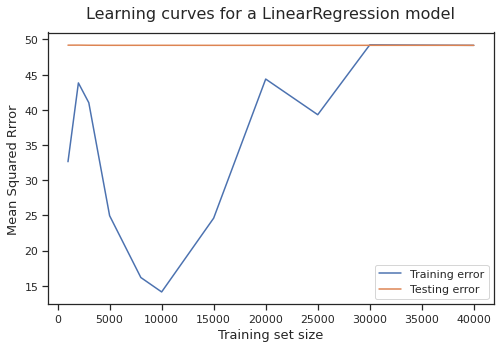

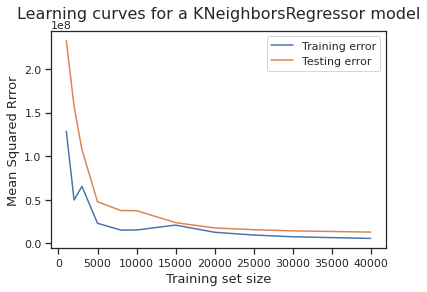

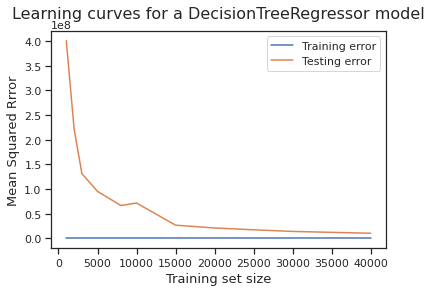

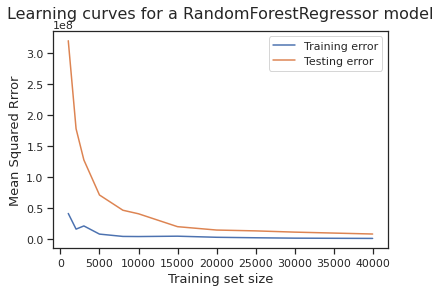

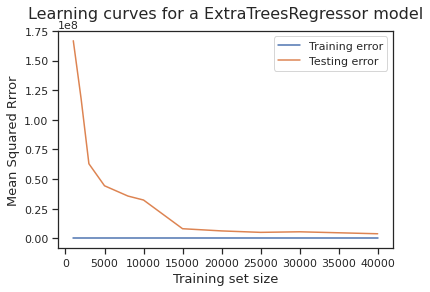

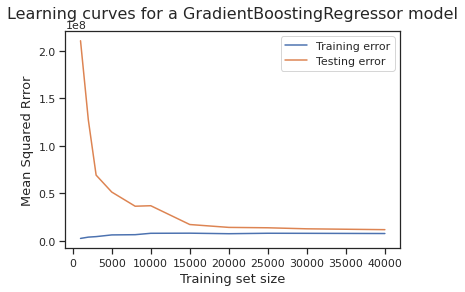

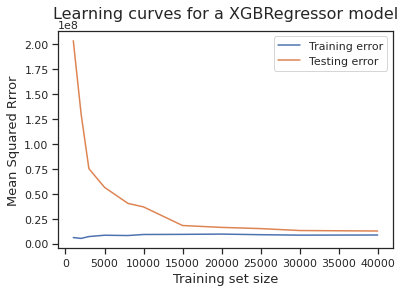

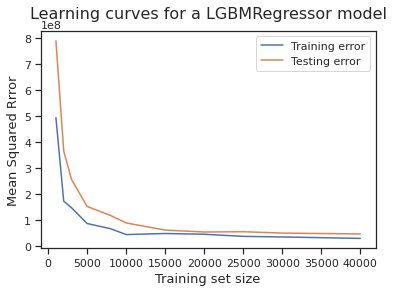

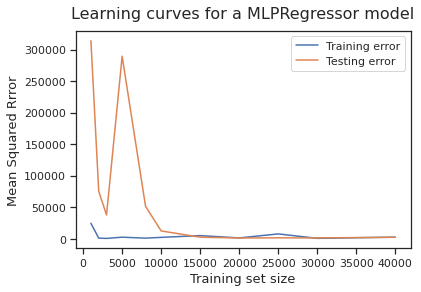

In [ ]:
train_sizes = [1000, 2000, 3000, 5000, 8000, 10000, 15000, 20000, 25000, 30000, 40000]
features = ['Likes', 'Shares', 'Comments']
target = ['Impact']
from sklearn.model_selection import learning_curve
def learning_curves(estimator, data, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, data[features], data[target], train_sizes =
    train_sizes,cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Testing error')

    plt.ylabel('Mean Squared Rrror', fontsize = 13)
    plt.xlabel('Training set size', fontsize = 13)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 16, y = 1.03)
    plt.legend()
    plt.show()

### Plotting the two learning curves ###

from sklearn.ensemble import RandomForestRegressor

plt.figure(figsize = (8,5))

model_list = [(LinearRegression(), 1), (KNeighborsRegressor(),2),(DecisionTreeRegressor(),3),(RandomForestRegressor(),4),
(ExtraTreesRegressor(),5),(GradientBoostingRegressor(),6),(XGBRegressor(objective = "reg:squarederror"),7),(LGBMRegressor(),8), (MLPRegressor(),9)]
for model, i in model_list:
    #plt.subplot(1,9,i)
    learning_curves(model, hypo_1, features, target, train_sizes, 5)

Except for Linear regression, the Mean squared error for other algorithms are lies between 5495 and 44495517. Due to 10 to the power 8(1e8) conversation of Mean squared error on Y-axis, the gap between training and testing error looks very small on graph but in reality, it is very high as compared to Linear regression.

**Linear model (Linear regression):**

    1. Range of Mean squared error for Linear regression is 12 to 50 Training and testing error marges at (Mean squared error =~ 50 and training set size =~ 30000). Adding more training instances till 30000 is very likely to lead to better models under the current algorithm 
    but after 30000 training instances won't increase the model performance.
    2. From the graph we can see that when the training size was less than 30000 model suffer from overfitting because the testing error was more than
    training error but after 30000 testing error =~ training error, so we can conclude that to avoid overfitting, train set size >= 30000
    3. Underfitting is when the training error is high but in our case, there are no signs of Underfitting
    4. Linear model gives testing error =~ training error, this indicates that linear model is the best fit solution for this problem 


From the above graph we can see that linear model performs the best.

Now comparing different linear models

In [ ]:
hypo_1 = df_twitter_s[['Id', 'Likes', 'Shares', 'Comments', 'Impact']]
X = hypo_1[['Likes', 'Shares', 'Comments']]
Y = hypo_1[['Impact']]

pipelines = []
pipelines.append(('LR', Pipeline([('LR', LinearRegression())])))
pipelines.append(('BR', Pipeline([('BR', BayesianRidge())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    t0 = time()
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean()*(-1))
    print(msg)
    print(cv_results*(-1))
    print ("training time:", round(time()-t0, 3), "s")
    print("")

LR: 49.167461
[ 16.26647733   1.13673868  59.75710356  11.99767649  24.33525139
 241.1410418   15.52730894   4.00160807   2.94259909 114.56880166]
training time: 0.136 s

BR: 49.167461
[ 16.26647733   1.13673868  59.75710356  11.99767648  24.3352514
 241.1410418   15.52730894   4.00160807   2.94259909 114.56880166]
training time: 0.245 s



Linear Regression and BayesianRidge give the same result but Linear Regression almost 1.65 times faster than BayesianRidge


So we will go with **Linear Regression**

Lets compare the time required by hypothsis hypo_1 with whole dataset

In [ ]:
X = df_twitter_s[train_cols]
Y = df_twitter_s[['Impact']]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)
t0 = time()
LR = LinearRegression().fit(X_train, Y_train)
print ("training time:", round(time()-t0, 3), "s")

t1 = time()
Y_pred = LR.predict(X_test)
print ("testing time:", round(time()-t1, 3), "s")
Y_pred_train = LR.predict(X_train)

print()
print()
print("train_RMSE:",np.sqrt(mean_squared_error(Y_pred_train, Y_train)))
print("test_RMSE:",np.sqrt(mean_squared_error(Y_pred,Y_test)))
print("train_Score", LR.score(X_train, Y_train))
print("test_Score", LR.score(X_test, Y_test))

print()
print('Coefficients:', LR.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination(R square): %.2f'% r2_score(Y_test, Y_pred))


training time: 0.028 s
testing time: 0.007 s


train_RMSE: 7.64292429944495
test_RMSE: 3.4673139990564597
train_Score 0.9999999944528241
test_Score 0.9999999989069689

Coefficients: [[ 2.24547903e-03  7.46469768e-04  2.25217863e-02 -1.61042929e-01
  -1.56491215e-10 -8.68096753e-09  5.85759438e-06 -4.10222612e-02
   2.58677098e-02 -2.27343423e-01  1.00000078e+01  1.00000023e+01
   1.00000047e+01]]
Mean squared error: 12.02
Coefficient of determination(R square): 1.00


In [ ]:
hypo_1 = df_twitter_s[['Id', 'Likes', 'Shares', 'Comments', 'Impact']]
X = hypo_1[['Likes', 'Shares', 'Comments']]
Y = hypo_1[['Impact']]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)
t0 = time()
LR = LinearRegression().fit(X_train, Y_train)
print ("training time:", round(time()-t0, 3), "s")

t1 = time()
Y_pred = LR.predict(X_test)
print ("testing time:", round(time()-t1, 3), "s")
Y_pred_train = LR.predict(X_train)

print()
print()
print("train_RMSE:",np.sqrt(mean_squared_error(Y_pred_train, Y_train)))
print("test_RMSE:",np.sqrt(mean_squared_error(Y_pred,Y_test)))
print("train_Score", LR.score(X_train, Y_train))
print("test_Score", LR.score(X_test, Y_test))

print()
print('Coefficients:', LR.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination(R square): %.2f'% r2_score(Y_test, Y_pred))


training time: 0.005 s
testing time: 0.005 s


train_RMSE: 7.645339288133374
test_RMSE: 3.4676499443034845
train_Score 0.999999994449318
test_Score 0.9999999989067568

Coefficients: [[10.00000502 10.0000079  10.00000524]]
Mean squared error: 12.02
Coefficient of determination(R square): 1.00


Time taken by the whole dataset is 0.035sec and by hypo_1 is 0.010.

hypo_1 is 3.5 times faster and gives the same results.

Coefficients from hypo_1 are: [[10.00000502 10.0000079  10.00000524]]

So formula for Imapct is:

    Impact = (10 x Likes) + (10 x Shares) + (10 x Comments)

lets test this formula

time required in applying the formula on whole dataset: 0.006 s




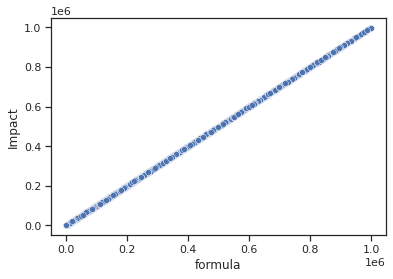

In [ ]:
t0 = time()
hypo_1['formula'] = (hypo_1['Likes'] * (10)) + hypo_1['Shares'] * (10) + hypo_1['Comments'] * (10)

print ("time required in applying the formula on whole dataset:", round(time()-t0, 3), "s")
#plt.scatter(hypo_1['Impact'], hypo_1['formula'])
#plt.show()
print()
print()
sns.scatterplot(x="formula", y="Impact", data=hypo_1)

From the graph we can conclude that, formula gives very good results


lets evalvaute this formula

In [ ]:
print('Coefficient of determination(R square) using the formula: %.2f'% r2_score(hypo_1['formula'],hypo_1['Impact']))
print("Acurracy score using the formula", accuracy_score(hypo_1['formula'],hypo_1['Impact']))

Coefficient of determination(R square) using the formula: 1.00
Acurracy score using the formula 0.99802


# Conclusion:


1.   No missing values
2.   likes and share are highly correlated with Impact 
3.   Likes, Shares, and comments show the linear relationship with Impact
4.   Adjusted r square values decrease without likes, share, and comments, and remains almost the same without other features. So likes, share, and comments 
are enough to predict the impact, we call this hypothesis is hypo_1 
5.   Linear model gives the lowest mean squared error result as compare to tree base models and neural networks 
6.   Result from hypo_1:
      
         > The Linear model gives the lowest mean squared error result as compare to tree base models and neural networks
         > Result from hypo_1 is better than the whole because here we only consider the three features which improve 
         performance and efficiency as error difference are only 0.02 for Linear models, which is negligible.
         > Time taken by the whole dataset is 0.035sec and by hypo_1 is 0.010.hypo_1 is 3.5 times faster and gives the same results

**Note: From the above result, all following analyses will be based on hypo_1**

7.   Analysis from learning curves(training vs testing):
      
         > Except for Linear regression, the Mean squared error for other algorithms are lies between 5495 and 44495517. Due to 
         10 to the power 8(1e8) conversation of Mean squared error on Y-axis, the gap between training and testing error looks 
         very small on graph but in reality, it is very high as compared to Linear regression.

         > Range of Mean squared error for Linear regression is 12 to 50 Training and testing error marges at 
         (Mean squared error =~ 50 and training set size =~ 30000). Adding more training instances till 30000 is very likely to 
         lead to better models under the current algorithm but after 30000 training instances won't increase the model performance.

         > From the above graph, when the training size was less than 30000 model suffer from overfitting because testing 
         the error was more than training error but after 30000 testing error =~ training error, so we can conclude that to avoid 
         overfitting, train set size >= 30000

         > Underfitting is when the training error is high but in our case, there are no signs of Underfitting

         > Linear model gives testing error =~ training error, therefore linear model is the best fit solution for this problem 

**Note: From the above result, all following analyses will be based on hypo_1 and linear models**

8.   Comparing linear models: Linear Regression and BayesianRidge give the same result but Linear Regression is almost 1.65 times faster than BayesianRidge. So we will go with Linear Regression

9.   Final reuslt from Linear Regression:

         > training time =  0.005 s   and   testing time = 0.005 s
         > Coefficients = [[10.00000502 10.0000079  10.00000524]]
         > Root Mean Squared Error (RMSE) = 3.467
         > Score = 0.9999
         > Coefficient of determination(R square) = 1.00

10.   Result from the formula created using Coefficients of Linear Regression:

          > Formula: Impact = (10 x Likes) + (10 x Shares) + (10 x Comments)
          > time required in applying the formula on whole dataset: 0.006 s, which is 1.67 times faster than Linear Regression
          > Graph between formula and Impact, gives single straight line, So the formula is correct.
          > Acurracy score using the formula 0.99802
          > Coefficient of determination(R square) using the formula: 1.00
